In [129]:
using Distributions
mu_1 = 8.0
sig_1 = sqrt(2)
mu_2 = 12.0
sig_2 = sqrt(2)
beta = 1#sqrt(1.0)

f_1(s1::Int) = pdf(Normal(mu_1, sig_1), s1)
f_2(s1::Int, p1::Int) = pdf(Normal(s1, beta), p1)
f_3(s2::Int) = pdf(Normal(mu_2, sig_2), s2)
f_4(s2::Int, p2::Int) = pdf(Normal(s2, beta), p2)
f_5(p1::Int, p2::Int, d::Int) = (p1 - p2 == d) ? 1.0 : 0.0 
f_6(d::Int) = if d > 0 ? 1.0 : 0.0 end

f_6 (generic function with 1 method)

In [130]:
# marginalization for s1

function marginalize_s1(N::Int, s1::Int)
    sum = 0.0
    for s2 in 1:N
        inner_sum_s2 = 0.0
        for p1 in 1:N
            inner_sum_p1 = 0.0
            for p2 in 1:p1 # its not wrong
                inner_sum_p1 += f_4(s2, p2)
            end
            inner_sum_p1 *= f_2(s1, p1)
            inner_sum_s2 += inner_sum_p1
        end
        inner_sum_s2 *= f_3(s2)
        sum += inner_sum_s2
    end
    return sum * f_1(s1)
end

marginalize_s1 (generic function with 1 method)

In [133]:
# marginalization for s1

function marginalize_s2(N::Int, s2::Int)
    sum = 0.0
    for s1 in 1:N
        inner_sum_s1 = 0.0
        for p1 in 1:N
            inner_sum_p1 = 0.0
            for p2 in 1:p1 # its not wrong
                inner_sum_p1 += f_4(s2, p2)
            end
            inner_sum_p1 *= f_2(s1, p1)
            inner_sum_s1 += inner_sum_p1
        end
        inner_sum_s1 *= f_1(s1)
        sum += inner_sum_s1
    end
    return sum * f_3(s2)
end

marginalize_s2 (generic function with 1 method)

In [134]:
function marginalize_s2_2(N::Int, s2::Int)
    sum = 0.0
    for s1 in 1:N
        for p1 in 1:N
            for p2 in 1:(p1 - 1) # its not wrong
                sum += (f_4(s2, p2) * f_2(s1, p1) * f_1(s1) * f_3(s2))
            end
        end
    end
    return sum
end

marginalize_s2_2 (generic function with 1 method)

In [135]:
function marginalize_p1(N::Int, p1::Int)
    sum = 0.0
    for s1 in 1:N
        inner_sum_s2= 0.0
        for s2 in 1:N
            inner_sum_p2 = 0.0
            for p2 in 1:p1
                inner_sum_s2 += f_4(s2, p2)
            end
            inner_sum_s2 += (f_3(s2) * inner_sum_s2)
        end
        sum += (f_1(s1) * f_2(s1,p1) * inner_sum_s2) 
    end
    return sum
end

marginalize_p1 (generic function with 1 method)

In [136]:
function marginalize_p2(N::Int, p2::Int)
    sum = 0.0
    for s1 in 1:N
        inner_sum_s2 = 0.0
        for s2 in 1:N
            inner_sum_p1 = 0.0
            for p1 in p2:N
                inner_sum_p1 += f_2(s1, p1)
            end
            inner_sum_s2 += inner_sum_p1 * (f_3(s2) * f_4(s2, p2))
        end
        sum += (inner_sum_s2 * f_1(s1))
    end
    return sum
end

marginalize_p2 (generic function with 1 method)

In [137]:
function marginalize_p2_2(N::Int, p2::Int)
    sum = 0.0
    for s1 in 1:N
        for s2 in 1:N
            for p1 in (p2+1):N
                sum += f_1(s1) * f_2(s1, p1) * f_3(s2) * f_4(s2, p2)
            end
        end
    end
    return sum
end

marginalize_p2_2 (generic function with 1 method)

In [138]:
function marginalize_d(N::Int, d::Int)
    if d <= 0
        return 0.0
    end
    sum = 0.0
    for s1 in 1:N
        inner_sum_s2 = 0.0
        for s2 in 1:N
            inner_sum_p1 =0.0
            for p1 in d:N
                inner_sum_p1 += f_2(s1, p1) * f_4(s2, p1 - d)
            end
            inner_sum_s2 += (inner_sum_p1 * f_3(s2))
        end
        sum = f_1(s1) * inner_sum_s2
    end
    return sum
end

marginalize_d (generic function with 1 method)

In [139]:
#forward
function_mf1_s1(s1::Int) = f_1(s1)
function_mf3_s2(s2::Int) = f_3(s2)
function_f_p_s1(s1::Int) = function_mf1_s1(s1) 
function_f_p_s2(s2::Int) = function_mf3_s2(s2)
function_mf2_p1(N::Int, p1::Int) = sum([f_2(s1, p1) * function_f_p_s1(s1) for s1 in 1:N])
function_mf4_p2(N::Int, p2::Int) = sum([f_4(s2, p2) * function_f_p_s2(s2) for s2 in 1:N])
function_f_p_p1(N::Int, p1::Int) = function_mf2_p1(N, p1) 
function_f_p_p2(N::Int, p2::Int) = function_mf4_p2(N, p2)
function_mp1_f5(N::Int, p1::Int) = function_f_p_p1(N, p1)
function_mp2_f5(N::Int, p2::Int) = function_f_p_p2(N, p2)
function_mf5_d(N::Int, d::Int) = sum((f_5(p1, p1 - d, d) *  function_mp1_f5(N,p1) * function_mp2_f5(N,p1 - d)) for p1 in d:N)
function_f_p_d(N::Int, d::Int) = function_mf5_d(N,d)

#backward
#observer d = 1
function_mf6_d(d::Int) = (d > 0.0) ? 1.0 : 0.0
function_p_d(N::Int, d::Int) = function_mf6_d(d) > 0.0 ? function_mf5_d(N,d) : 0.0
function_md_f5(N::Int, d::Int) = (function_mf5_d(N, d) > 0.0 )  ? (function_p_d(N, d) / function_mf5_d(N, d)) : 0.0
function_mf5_p1(N::Int, p1::Int) = sum((function_md_f5(N, d) *  function_mp2_f5(N, p1 - d)) for d in 1:N) # d = p1 - p2, p2 = p1 - d
function_mf5_p2(N::Int, p2::Int) = sum((function_md_f5(N, d) *  function_mp1_f5(N, p2 + d)) for d in 1:N) # p1 = p2 + d
function_p_p1(N::Int, p1::Int ) = function_mf2_p1(N, p1) * function_mf5_p1(N, p1) # sum()
function_p_p2(N::Int, p2::Int ) = function_mf4_p2(N, p2) * function_mf5_p2(N, p2)
function_mf2_s1(N::Int, s1::Int) = sum( ( f_2(s1, p1) * (function_p_p1(N,p1) / function_mf2_p1(N, p1)) ) for p1 in 1:N)
function_mf4_s2(N::Int, s2::Int) = sum( ( f_4(s2, p2) * (function_p_p2(N,p2) / function_mf4_p2(N, p2)) ) for p2 in 1:N)
function_p_s1(N::Int, s1::Int) = function_mf1_s1(s1) * function_mf2_s1(N,s1)
function_p_s2(N::Int, s2::Int) = function_mf3_s2(s2) * function_mf4_s2(N, s2)


function_p_s2 (generic function with 1 method)

In [140]:
# calculating using vector
#forward

function calculateAllMarginalsViaMsg(N::Int=20)
    #N = 20
    mf1_s1 = [f_1(s1) for s1 in 1:N]
    mf3_s2 = [f_3(s2) for s2 in 1:N]
    f_p_s1 = copy(mf1_s1)
    f_p_s2 = copy(mf3_s2)
    mf2_p1 = [sum([f_2(s1, p1) * f_p_s1[s1] for s1 in 1:N]) for p1 in 1:N]
    mf4_p2 = [sum([f_4(s2, p2) * f_p_s2[s2] for s2 in 1:N]) for p2 in 1:N]
    f_p_p1 = copy( mf2_p1 )
    f_p_p2 = copy(mf4_p2)
    mp1_f5 = copy(f_p_p1)
    mp2_f5 = copy(f_p_p2)
    mf5_d = [sum([f_5(p1, p1 - d, d) *  mp1_f5[p1] * mp2_f5[p1 - d] for p1 in max(d + 1,1): min(N,N + d) ];init = 0.0) for d in -N:N]
    f_p_d = copy(mf5_d)

    #backward
    #observer d = 1
    mf6_d = [(d > 0.0) ? 1.0 : 0.0 for d in -N:N]
    p_d =  [ mf6_d[d + N + 1] > 0.0 ? mf5_d[d+ N + 1] : 0.0 for d in -N:N]
    md_f5 = [(mf5_d[d + N + 1] > 0.0 ) ? (p_d[d + N + 1] / mf5_d[d + N + 1]) : 0.0 for d in -N:N]
    mf5_p1 = [sum([md_f5[d+N+1] * mp2_f5[p1 - d] for d in 1:(p1-1)]; init=0.0) for p1 in 1:N]
    mf5_p2 = [ sum([md_f5[d + N + 1 ] *  mp1_f5[p2 + d] for d in 1:(N - p2)]; init = 0.0) for p2 in 1:N ] # p2 + d = p1 / p1 in 1:N -> d 1:N-p2 
    p_p1 = [ (mf2_p1[p1] * mf5_p1[p1]) for p1 in 1:N]
    p_p2 = [ (mf4_p2[p2] * mf5_p2[p2]) for p2 in 1:N]
    mf2_s1 = [ sum([ f_2(s1, p1) * (p_p1[p1] / mf2_p1[p1]) for p1 in 1:N ]) for s1 in 1:N ]
    mf4_s2 = [sum([  f_4(s2, p2) * (p_p2[p2] / mf4_p2[p2]) for p2 in 1:N]) for s2 in 1:N]
    p_s1 = [mf1_s1[s1] * mf2_s1[s1] for s1 in 1:N]
    p_s2 = [mf3_s2[s2] * mf4_s2[s2] for s2 in 1:N]

    return (p_s1, p_s2, p_p1, p_p2, p_d)
end


calculateAllMarginalsViaMsg (generic function with 3 methods)

In [141]:
function_p_s1(20, 8)

0.0032418671794305015

In [142]:
marginalize_s1(20,8)

0.010857163776941575

In [143]:
p_s1, p_s2, p_p1, p_p2, p_d = calculateAllMarginalsViaMsg()

([4.278917360864382e-15, 1.98493366542437e-12, 4.358609397206976e-10, 4.5427300957313815e-8, 2.250977470758986e-6, 5.313882431802023e-5, 0.0005993230673042505, 0.003241867176939166, 0.008455567651416591, 0.010714592933109834, 0.0066669829698692215, 0.0020680640357148778, 0.0003265987176974663, 2.700702886671425e-5, 1.2104888010303388e-6, 3.052372680628535e-8, 4.4756126484021037e-10, 3.88913638434922e-12, 1.93439086567631e-14, 4.5763219004645314e-17], [1.436943260690744e-14, 3.677616279038943e-12, 4.4555441791735476e-10, 3.051947831117188e-8, 1.2104867941936796e-6, 2.700702865549533e-5, 0.00032659871769722646, 0.0020680640357597776, 0.006666982970127755, 0.010714592934012205, 0.008455567653326912, 0.003241867179392065, 0.00059932306921457, 5.3138825220391205e-5, 2.25097772929221e-6, 4.542734587763755e-8, 4.3586565330131347e-10, 1.98521865070465e-12, 4.287127327015178e-15, 4.383232190169889e-18], [0.0, 2.294348830600028e-13, 4.895712674285502e-11, 5.27306561930493e-9, 2.928535516792053e-

In [144]:
p_s1

20-element Vector{Float64}:
 4.278917360864382e-15
 1.98493366542437e-12
 4.358609397206976e-10
 4.5427300957313815e-8
 2.250977470758986e-6
 5.313882431802023e-5
 0.0005993230673042505
 0.003241867176939166
 0.008455567651416591
 0.010714592933109834
 0.0066669829698692215
 0.0020680640357148778
 0.0003265987176974663
 2.700702886671425e-5
 1.2104888010303388e-6
 3.052372680628535e-8
 4.4756126484021037e-10
 3.88913638434922e-12
 1.93439086567631e-14
 4.5763219004645314e-17

In [145]:
p_s1[8]

0.003241867176939166

In [146]:
function calculateAllMarginals()
    N = 20
    for i in 1:N marginalize_s1(20, i) end
    for i in 1:N marginalize_s2(20, i) end
    for i in 1:N marginalize_p1(20, i) end
    for i in 1:N marginalize_p2(20, i) end
    for i in -N:N marginalize_d(20, i) end
end

calculateAllMarginals (generic function with 1 method)

In [147]:
using BenchmarkTools
t1 = @belapsed calculateAllMarginalsViaMsg()
t2 = @belapsed calculateAllMarginals()

println("ViaMsg: $t1 seconds")
println("Direct: $t2 seconds")
println("Speedup: ", t2 / t1, "× (ViaMsg vs Direct)")

ViaMsg: 0.000408916 seconds
Direct: 0.130535833 seconds
Speedup: 319.2240778057107× (ViaMsg vs Direct)


In [148]:
for i in 15:40
    println("iteration $i")
    println(marginalize_s1(i,8))
    p_s1, p_s2, p_p1, p_p2, p_d= calculateAllMarginalsViaMsg(i)
    println(length(p_s1))
end

iteration 15
0.010857163729929922
15
iteration 16
0.010857163776871374
16
iteration 17
0.010857163776941535
17
iteration 18
0.010857163776941575
18
iteration 19
0.010857163776941575
19
iteration 20
0.010857163776941575
20
iteration 21
0.010857163776941575
21
iteration 22
0.010857163776941575
22
iteration 23
0.010857163776941575
23
iteration 24
0.010857163776941575
24
iteration 25
0.010857163776941575
25
iteration 26
0.010857163776941575
26
iteration 27
0.010857163776941575
27
iteration 28
0.010857163776941575
28
iteration 29
0.010857163776941575
29
iteration 30
0.010857163776941575
30
iteration 31
0.010857163776941575
31
iteration 32
0.010857163776941575
32
iteration 33
0.010857163776941575
33
iteration 34
0.010857163776941575
34
iteration 35
0.010857163776941575
35
iteration 36
0.010857163776941575
36
iteration 37
0.010857163776941575
37
iteration 38
0.010857163776941575
38
iteration 39
0.010857163776941575
39
iteration 40
0.010857163776941575
40


In [149]:
p_s1, p_s2, p_p1, p_p2, p_d = calculateAllMarginalsViaMsg(40)

([4.278917360864382e-15, 1.98493366542437e-12, 4.358609397206976e-10, 4.5427300957313815e-8, 2.250977470758986e-6, 5.313882431802023e-5, 0.0005993230673042505, 0.003241867176939166, 0.008455567651416591, 0.010714592933109834  …  1.0350226192872288e-58, 8.165629647056771e-64, 3.9073496441816533e-69, 1.134038061593707e-74, 1.996299707441987e-80, 2.1314540339879913e-86, 1.3801347101743454e-92, 5.396952599284176e-99, 1.2160160333439033e-105, 1.3055018908558647e-112], [1.4369432606909403e-14, 3.6776162790394445e-12, 4.455544179174162e-10, 3.0519478311176205e-8, 1.2104867941938637e-6, 2.7007028655500072e-5, 0.00032659871769730056, 0.002068064035760482, 0.0066669829701318075, 0.01071459293402635  …  1.936184286886233e-72, 2.4678046025325302e-79, 1.4859375961240667e-86, 4.226754731838688e-94, 5.679641155047154e-102, 3.6052431701276314e-110, 1.0810467836446107e-118, 1.5312572614314143e-127, 1.0245693438505802e-136, 3.23832528516987e-146], [0.0, 2.294348830600028e-13, 4.895712674285502e-11, 5.27

In [150]:
p_s1

40-element Vector{Float64}:
 4.278917360864382e-15
 1.98493366542437e-12
 4.358609397206976e-10
 4.5427300957313815e-8
 2.250977470758986e-6
 5.313882431802023e-5
 0.0005993230673042505
 0.003241867176939166
 0.008455567651416591
 0.010714592933109834
 ⋮
 8.165629647056771e-64
 3.9073496441816533e-69
 1.134038061593707e-74
 1.996299707441987e-80
 2.1314540339879913e-86
 1.3801347101743454e-92
 5.396952599284176e-99
 1.2160160333439033e-105
 1.3055018908558647e-112

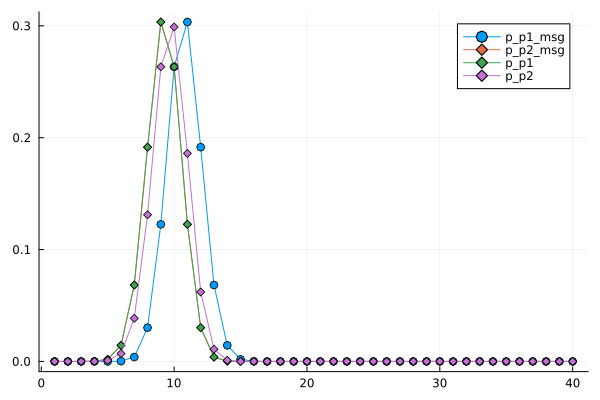

In [151]:
using Plots

# (Optional but often helpful in Jupyter)
gr()   # choose GR backend

# x values
xs = 1:40

# your first function
ys1 = p_p1#[marginalize_s1(20, i) for i in xs]

# your comparison vector (must already be defined!)
# make sure it has length 20:
@assert length(p_s1) == 40 "p_s1 must have length 20"

ys2 = p_p2 # or p_s1[1:20] if it's longer
ys3 = [marginalize_p2_2(40, i) for i in xs]
ys4 = [marginalize_p2(40, i) for i in xs]

ys1_norm = ys1 / sum(ys1)
ys2_norm = ys2 / sum(ys2)
ys3_norm = ys3 / sum(ys3)
ys4_norm = ys4 / sum(ys4)

# build the plot object
plt = plot(xs, ys1_norm,
           label = "p_p1_msg",
           marker = :o)

plot!(plt, xs, ys2_norm,
      label = "p_p2_msg",
      marker = :diamond)
plot!(plt, xs, ys3_norm,
      label = "p_p1",
      marker = :diamond)
plot!(plt, xs, ys4_norm,
      label = "p_p2",
      marker = :diamond)
# In Jupyter, explicitly display the plot:
display(plt)


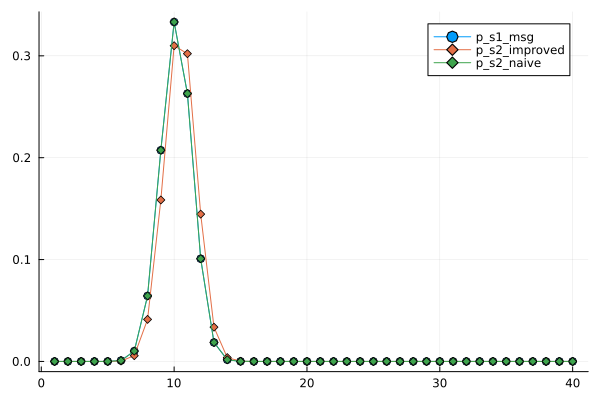

In [152]:
using Plots

# (Optional but often helpful in Jupyter)
gr()   # choose GR backend

# x values
xs = 1:40

# your first function
ys1 = p_s2#[marginalize_s1(20, i) for i in xs]

# your comparison vector (must already be defined!)
# make sure it has length 20:
@assert length(p_s2) == 40 "p_s1 must have length 20"

ys2 = [marginalize_s2(40, i) for i in xs]
ys3 = [marginalize_s2_2(40, i) for i in xs]

ys1_norm = ys1 / sum(ys1)
ys2_norm = ys2 / sum(ys2)
ys3_norm = ys3 / sum(ys3)

# build the plot object
plt = plot(xs, ys1_norm,
           label = "p_s1_msg",
           marker = :o)
plot!(plt, xs, ys2_norm,
      label = "p_s2_improved",
      marker = :diamond)
plot!(plt, xs, ys3_norm,
      label = "p_s2_naive",
      marker = :diamond)

# In Jupyter, explicitly display the plot:
display(plt)


In [ ]:
using Plots

# (Optional but often helpful in Jupyter)
gr()   # choose GR backend

# x values
xs = 1:40

# your first function
ys1 = p_d#[marginalize_s1(20, i) for i in xs]

# your comparison vector (must already be defined!)
# make sure it has length 20:
@assert length(p_s2) == 40 "p_s1 must have length 20"

ys2 = [marginalize_s2(40, i) for i in xs]

ys1_norm = ys1 / sum(ys1)
ys2_norm = ys2 / sum(ys2)

# build the plot object
plt = plot(xs, ys1_norm,
           label = "p_s1_msg",
           marker = :o)
plot!(plt, xs, ys2_norm,
      label = "p_s2_improved",
      marker = :diamond)


# In Jupyter, explicitly display the plot:
display(plt)


0.007054240475539542

In [76]:
[marginalize_p1(20, i) for i in xs]

20-element Vector{Float64}:
 0.0020369788091420143
 0.017317505856582354
 0.0859114455520396
 0.2992653401695008
 0.7826133129274404
 1.587727277724696
 2.5431729579656195
 3.247212535821729
 3.321706400237296
 2.7288242896671577
 1.8027881110309847
 0.95934450424907
 0.41228017602919576
 0.14357337458584074
 0.0406543394413966
 0.009385170648881436
 0.001768807347356971
 0.0002721335729170494
 3.4129789072505e-5
 3.4830248514148725e-6

In [ ]:
marginalize_s2_2(20, 15)

9.423444963454014e-28

In [98]:
marginalize_s2(20, 15)

0.0039841766669786735